# Fraud Detection using Kaggle Dataset
https://www.kaggle.com/c/ieee-fraud-detection/data

Lets start from importing all neccessary libraries and mounting our Google drive, as we will be uploading Kaggle Dataset to our Google Drive 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive



Using Kaggle's beta API, you can interact with Competitions and Datasets to download data, make submissions, and more via the command line, go to your Kaggle account and click "Create new API token", it will generate kaggle.json file which automaticaly will be downloaded.

In [0]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"bulavk1n","key":"930d08f183b0b9f22733a11fb104f1bb"}'}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


Now we can download Kaggle Dataset for our competition

In [0]:
!kaggle competitions download -c ieee-fraud-detection -p /content/drive/My\ Drive/kaggle/fraud_detection

 78% 41.0M/52.5M [00:00<00:00, 45.7MB/s]
100% 52.5M/52.5M [00:00<00:00, 77.0MB/s]
  0% 0.00/3.02M [00:00<?, ?B/s]
100% 3.02M/3.02M [00:00<00:00, 49.0MB/s]
 87% 41.0M/47.3M [00:00<00:00, 47.3MB/s]
100% 47.3M/47.3M [00:00<00:00, 60.8MB/s]
  0% 0.00/2.97M [00:00<?, ?B/s]
100% 2.97M/2.97M [00:00<00:00, 97.7MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 76.8MB/s]


After that we need to unzip it in our directory, I created separate folders for train and for test data files

In [0]:
import os
os.chdir('/content/drive/My Drive/kaggle/fraud_detection')  #change dir

In [0]:
!mkdir train  #create a directory named train/
!mkdir test  #create a directory named test/
!unzip -q train_transaction.csv.zip -d train/  #unzip data in train/
!unzip -q train_identity.csv.zip -d train/  #unzip data in train/

!unzip -q test_transaction.csv.zip -d test/  #unzip data in test/
!unzip -q test_identity.csv.zip -d test/  #unzip data in test/
!unzip sample_submission.csv.zip


Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


Lets take a look at our Files:

In [0]:
os.chdir('/content/drive/My Drive/kaggle/fraud_detection/test')  #change dir
# Read the CSV file
!chmod 750 test_transaction.csv 
df_test_transaction = pd.read_csv('test_transaction.csv')

In [14]:
# Show the contents
df_test_transaction

        TransactionID  TransactionDT  TransactionAmt  ... V337  V338  V339
0             3663549       18403224          31.950  ...  NaN   NaN   NaN
1             3663550       18403263          49.000  ...  NaN   NaN   NaN
2             3663551       18403310         171.000  ...  NaN   NaN   NaN
3             3663552       18403310         284.950  ...  NaN   NaN   NaN
4             3663553       18403317          67.950  ...  NaN   NaN   NaN
5             3663554       18403323          57.950  ...  NaN   NaN   NaN
6             3663555       18403350          87.000  ...  NaN   NaN   NaN
7             3663556       18403387         390.000  ...  NaN   NaN   NaN
8             3663557       18403405         103.950  ...  NaN   NaN   NaN
9             3663558       18403416         117.000  ...  NaN   NaN   NaN
10            3663559       18403474         261.950  ...  NaN   NaN   NaN
11            3663560       18403504         107.950  ...  NaN   NaN   NaN
12            3663561    

In [0]:
!chmod 750 test_identity.csv 
df_test_identity = pd.read_csv('test_identity.csv')

In [9]:
# Show the contents
df_test_identity

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW
5,3663622,-5.0,36786.0,NaN,NaN,4.0,-2.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,-480.0,New,NotFound,166.0,15.0,352.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.4.0,mobile safari 11.0,32.0,2208x1242,match_status:2,T,F,F,T,mobile,iOS Device
6,3663624,-5.0,12577.0,0.0,0.0,2.0,-2.0,NaN,NaN,0.0,0.0,100.0,Found,27.0,-480.0,Found,Found,166.0,15.0,352.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,iOS 11.4.0,mobile safari 11.0,32.0,2208x1242,match_status:2,T,F,F,T,mobile,iOS Device
7,3663626,-5.0,44726.0,0.0,0.0,0.0,-2.0,NaN,NaN,0.0,0.0,100.0,Found,27.0,-480.0,Found,Found,166.0,15.0,352.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,iOS 11.4.0,mobile safari 11.0,32.0,2208x1242,match_status:2,T,F,F,T,mobile,iOS Device
8,3663629,-5.0,125997.0,0.0,0.0,2.0,-2.0,NaN,NaN,0.0,0.0,100.0,Found,27.0,-480.0,Found,Found,166.0,15.0,352.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,iOS 11.4.0,mobile safari 11.0,32.0,2208x1242,match_status:2,T,F,F,T,mobile,iOS Device
9,3663658,-5.0,98741.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,Found,27.0,-360.0,New,NotFound,166.0,NaN,529.0,214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.4.0,mobile safari 11.0,32.0,2048x1536,match_status:2,T,F,F,F,mobile,iOS Device


In [0]:
os.chdir('/content/drive/My Drive/kaggle/fraud_detection/train')  #change dir
# Read the CSV file
!chmod 750 train_transaction.csv 
df_train_transaction = pd.read_csv('train_transaction.csv')

In [11]:
df_train_transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.000000,354.000000,0.000000,135.000000,0.000000,0.000000,0.000000,50.000000,1404.000000,790.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0,36.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,debit,126.0,87.0,0.0,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,debit,325.0,87.0,NaN,NaN,mail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,NaN,

In [0]:
os.chdir('/content/drive/My Drive/kaggle/fraud_detection/train')  #change dir
# Read the CSV file
!chmod 750 train_identity.csv 
df_train_identity = pd.read_csv('train_identity.csv')

In [13]:
df_train_identity

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.000000,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.000000,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.000000,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.000000,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,0.0,100.000000,NotFound,52.0,-300.0,Found,Found,166.0,18.0,529.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,0.0,100.000000,Found,NaN,-300.0,Found,Found,166.0,15.0,352.0,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.000000,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987048,-5.0,257037.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.000000,NotFound,52.0,NaN,New,NotFound,225.0,NaN,484.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


As we can see, we are dealing here with quite large Data sets, it will be better to use a function which can reduce the memory of the dataframe:

In [0]:
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [8]:
%%time
df_train_identity = reduce_mem_usage(df_train_identity)
df_test_identity = reduce_mem_usage(df_test_identity)
df_train_transaction = reduce_mem_usage(df_train_transaction)
df_test_transaction = reduce_mem_usage(df_test_transaction)

Mem. usage decreased to 25.86 Mb (42.7% reduction)
Mem. usage decreased to 25.44 Mb (42.7% reduction)
Mem. usage decreased to 542.35 Mb (69.4% reduction)
Mem. usage decreased to 472.59 Mb (68.9% reduction)
CPU times: user 2min 58s, sys: 1.79 s, total: 3min
Wall time: 3min


Perfect, now when we optimized files lets merge _identity and _transaction on the same column "TransactionID" 
since _identity refers to which type of device we used for transactions and _transactions shows what transactions we made- like the amount of transaction, card type etc.

After merging them it will be better to delete both csv files from the memory since they will be occupying the unnecessary space on the disk which may lead to memory error.

In [9]:
%%time
df_train = pd.merge(df_train_transaction, df_train_identity, on='TransactionID', how='left')
df_test = pd.merge(df_test_transaction, df_test_identity, on='TransactionID', how='left')

CPU times: user 5.84 s, sys: 250 ms, total: 6.09 s
Wall time: 6.1 s


In [0]:
del df_train_identity, df_train_transaction, df_test_identity, df_test_transaction

In [11]:
values = df_train.notnull().sum().sort_values(ascending=False)
missing_per = ((values)/len(df_train)) * 100
pd.concat([values, missing_per], keys=['Values', 'Not Missing %'], axis=1)

,Values,Not Missing %
TransactionID,590540,100.000000
C9,590540,100.000000
C1,590540,100.000000
C2,590540,100.000000
C3,590540,100.000000
C4,590540,100.000000
C5,590540,100.000000
C6,590540,100.000000
card1,590540,100.000000
C8,590540,100.000000


Lets delete the Data which is above 90% missing

In [0]:
def delete_too_much_missing_data(data):
    too_much_null_cols = [col for col in data.columns if data[col].isnull().sum()/data.shape[0]>0.9]
    return too_much_null_cols

Lets see if we have repeated data or not:

In [13]:
dupes = df_train.duplicated()
sum(dupes)

0

Lets take a look if we have repeated values in each feature vector or not:

In [14]:
repeated_values = [col for col in df_train.columns if df_train[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
repeated_values

['isFraud',
 'dist2',
 'C3',
 'D7',
 'V98',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124',
 'V125',
 'V129',
 'V132',
 'V133',
 'V134',
 'V135',
 'V136',
 'V137',
 'V281',
 'V284',
 'V286',
 'V290',
 'V293',
 'V295',
 'V296',
 'V297',
 'V298',
 'V299',
 'V300',
 'V301',
 'V305',
 'V309',
 'V311',
 'V316',
 'V318',
 'V319',
 'V320',
 'V321',
 'id_07',
 'id_08',
 'id_18',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27']

Its good to convert it into a function:

In [0]:
def get_too_many_repeated_val(data):
    big_top_value_cols = [col for col in data.columns if data[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
    return big_top_value_cols

In [0]:
def get_useless_columns(data, target):
    too_many_null = delete_too_much_missing_data(data)
    print("More than 90% null: " + str(len(too_many_null)))
    too_many_repeated = get_too_many_repeated_val(data)
    print("More than 90% repeated value: " + str(len(too_many_repeated)))
    cols_to_drop = list(set(too_many_null + too_many_repeated))
    cols_to_drop.remove(target)
    return cols_to_drop

In [17]:
cols_to_drop = get_useless_columns(df_train, 'isFraud')

More than 90% null: 12
More than 90% repeated value: 67


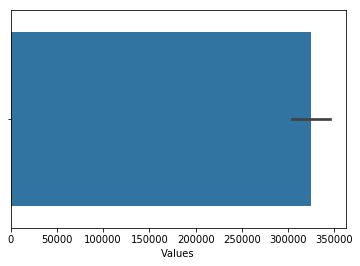

In [18]:
missing_data = pd.concat([values, missing_per], keys=['Values', 'Not Missing %'], axis=1)
sns.barplot(missing_data['Values'], data=missing_data)

ID columns seems to be having alot of missing let's take a peek at them:


In [19]:
for i in range(1, 10):
    print(df_train['id_0' + str(i)].value_counts(dropna=False, normalize=True).head())
    print('\n')
    
for i in range(10, 39):
    print(df_train['id_' + str(i)].value_counts(dropna=False, normalize=True).head())
    print('\n')

 NaN     0.755761
-5.0     0.139144
 0.0     0.033114
-10.0    0.019062
-20.0    0.018984
Name: id_01, dtype: float64


NaN       0.761452
1102.0    0.000019
696.0     0.000017
1116.0    0.000015
1120.0    0.000015
Name: id_02, dtype: float64


NaN    0.887689
0.0    0.108211
1.0    0.001461
3.0    0.001131
2.0    0.000713
Name: id_03, dtype: float64


 NaN    0.887689
 0.0    0.111320
-5.0    0.000224
-6.0    0.000166
-8.0    0.000108
Name: id_04, dtype: float64


NaN    0.768238
0.0    0.157048
1.0    0.014043
2.0    0.008360
3.0    0.006526
Name: id_05, dtype: float64


 NaN    0.768238
 0.0    0.154647
-1.0    0.007937
-5.0    0.006518
-6.0    0.005515
Name: id_06, dtype: float64


NaN     0.991271
0.0     0.000693
16.0    0.000415
14.0    0.000386
12.0    0.000352
Name: id_07, dtype: float64


 NaN      0.991271
-100.0    0.000847
 0.0      0.000442
-34.0     0.000435
-33.0     0.000354
Name: id_08, dtype: float64


NaN    0.873123
0.0    0.119176
1.0    0.002736
3.0    0.001636
2

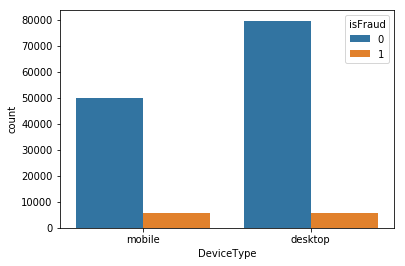

In [20]:
sns.countplot(df_train['DeviceType'], hue='isFraud', data=df_train)

Lets take a look at the Cards:

In [21]:
for i in range(1, 7):
    print(df_train['card' + str(i)].value_counts(dropna=False, normalize=True).head())
    print('\n')

7919     0.025285
9500     0.023981
15885    0.017545
17188    0.017516
15066    0.013454
Name: card1, dtype: float64


321.0    0.082865
111.0    0.076525
555.0    0.071113
490.0    0.064593
583.0    0.036920
Name: card2, dtype: float64


150.0    0.882729
185.0    0.095414
106.0    0.002660
NaN      0.002650
146.0    0.002120
Name: card3, dtype: float64


visa                0.651551
mastercard          0.320414
american express    0.014102
discover            0.011263
NaN                 0.002670
Name: card4, dtype: float64


226.0    0.502161
224.0    0.138031
166.0    0.096759
102.0    0.049285
117.0    0.043928
Name: card5, dtype: float64


debit              0.744976
credit             0.252288
NaN                0.002660
debit or credit    0.000051
charge card        0.000025
Name: card6, dtype: float64




In [22]:
for i in range(1, 15):
    print(df_train['C' + str(i)].value_counts(dropna=False, normalize=True).head())
    print('\n')

1.0    0.536443
2.0    0.177924
3.0    0.086895
4.0    0.048845
5.0    0.030348
Name: C1, dtype: float64


1.0    0.535545
2.0    0.176022
3.0    0.087666
4.0    0.047839
5.0    0.028738
Name: C2, dtype: float64


0.0    0.995887
1.0    0.003619
2.0    0.000305
3.0    0.000098
4.0    0.000012
Name: C3, dtype: float64


0.0    0.765203
1.0    0.189347
2.0    0.022004
3.0    0.008380
4.0    0.003221
Name: C4, dtype: float64


0.0    0.630669
1.0    0.208086
2.0    0.058888
3.0    0.022334
4.0    0.011562
Name: C5, dtype: float64


1.0    0.578372
2.0    0.145804
0.0    0.083087
3.0    0.060098
4.0    0.030150
Name: C6, dtype: float64


0.0    0.885871
1.0    0.087997
2.0    0.012385
3.0    0.003443
4.0    0.001878
Name: C7, dtype: float64


0.0    0.758064
1.0    0.177793
2.0    0.026970
3.0    0.009302
4.0    0.004770
Name: C8, dtype: float64


1.0    0.387676
0.0    0.311232
2.0    0.131793
3.0    0.055043
4.0    0.027426
Name: C9, dtype: float64


0.0    0.767843
1.0    0.169728
2.0  

In [23]:
for i in range(1, 16):
    print(df_train['D' + str(i)].value_counts(dropna=False, normalize=True).head())
    print('\n')

0.0    0.474362
1.0    0.014621
2.0    0.008414
3.0    0.006696
4.0    0.006045
Name: D1, dtype: float64


NaN    0.475492
0.0    0.025610
1.0    0.011268
2.0    0.007542
3.0    0.006227
Name: D2, dtype: float64


NaN    0.445149
0.0    0.123775
1.0    0.035998
2.0    0.023350
7.0    0.022556
Name: D3, dtype: float64


NaN    0.286047
0.0    0.282066
1.0    0.009000
2.0    0.005732
3.0    0.004355
Name: D4, dtype: float64


NaN    0.524674
0.0    0.110707
1.0    0.025878
2.0    0.017347
7.0    0.016483
Name: D5, dtype: float64


NaN      0.876068
0.0      0.077526
1.0      0.002689
256.0    0.001516
2.0      0.001448
Name: D6, dtype: float64


NaN    0.934099
0.0    0.035789
1.0    0.002908
2.0    0.001690
3.0    0.001339
Name: D7, dtype: float64


NaN         0.873123
0.791504    0.002288
0.833496    0.002247
0.875000    0.002208
0.958496    0.002201
Name: D8, dtype: float64


NaN         0.873123
0.791504    0.009124
0.833496    0.008929
0.750000    0.008716
0.708496    0.008690
Name

In [24]:
for i in range(1, 10):
    print(df_train['M' + str(i)].value_counts(dropna=False, normalize=True).head())
    print('\n')

T      0.540886
NaN    0.459071
F      0.000042
Name: M1, dtype: float64


T      0.483402
NaN    0.459071
F      0.057527
Name: M2, dtype: float64


NaN    0.459071
T      0.426273
F      0.114656
Name: M3, dtype: float64


NaN    0.476588
M0     0.332585
M2     0.101373
M1     0.089454
Name: M4, dtype: float64


NaN    0.593494
F      0.224356
T      0.182150
Name: M5, dtype: float64


F      0.385843
T      0.327368
NaN    0.286788
Name: M6, dtype: float64


NaN    0.586353
F      0.357933
T      0.055713
Name: M7, dtype: float64


NaN    0.586331
F      0.262897
T      0.150772
Name: M8, dtype: float64


NaN    0.586331
T      0.348251
F      0.065418
Name: M9, dtype: float64




Now its time for some Feature Ingeneering:

In [0]:
def adding_uid(data):
    data['uid1'] = data['card1'].astype(str)+'_'+data['card2'].astype(str)
    data['uid2'] = data['uid1'].astype(str)+'_'+data['card3'].astype(str)+'_'+data['card5'].astype(str)
    data['uid3'] = data['uid2'].astype(str)+'_'+data['addr1'].astype(str)+'_'+data['addr2'].astype(str)
    return data

In [0]:
df_train = adding_uid(df_train)
df_test = adding_uid(df_test)

In [0]:
i_cols = ['card1','card2','card3','card5','uid1','uid2','uid3']

for col in i_cols:
    for agg_type in ['mean','std']:
        new_col_name = col+'_TransactionAmt_'+agg_type
        temp_df = pd.concat([df_train[[col, 'TransactionAmt']], df_test[[col,'TransactionAmt']]])
        temp_df = temp_df.groupby([col])['TransactionAmt'].agg([agg_type]).reset_index().rename(
                                                columns={agg_type: new_col_name})

        temp_df.index = list(temp_df[col])
        temp_df = temp_df[new_col_name].to_dict()   

        df_train[new_col_name] = df_train[col].map(temp_df)
        df_test[new_col_name]  = df_test[col].map(temp_df)

In [0]:
df_train = df_train.replace(np.inf,999)
df_test = df_test.replace(np.inf,999)

In [29]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,uid1,uid2,uid3,card1_TransactionAmt_mean,card1_TransactionAmt_std,card2_TransactionAmt_mean,card2_TransactionAmt_std,card3_TransactionAmt_mean,card3_TransactionAmt_std,card5_TransactionAmt_mean,card5_TransactionAmt_std,uid1_TransactionAmt_mean,uid1_TransactionAmt_std,uid2_TransactionAmt_mean,uid2_TransactionAmt_std,uid3_TransactionAmt_mean,uid3_TransactionAmt_std
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13926_nan,13926_nan_150.0_142.0,13926_nan_150.0_142.0_315.0_87.0,316.5000,999.0000,NaN,NaN,147.625,255.25,185.250,999.000,258.0000,210.7500,258.0000,210.7500,193.0000,176.1250
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2755_404.0,2755_404.0_150.0_102.0,2755_404.0_150.0_102.0_325.0_87.0,213.0000,999.0000,227.125,999.000,147.625,255.25,212.750,999.000,213.6250,999.0000,213.6250,999.0000,240.0000,999.0000
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4663_490.0,4663_490.0_150.0_166.0,4663_490.0_150.0_166.0_330.0_87.0,104.8750,130.3750,136.125,228.625,147.625,255.25,98.750,141.125,104.8125,130.3750,104.8125,130.3750,65.6875,55.1875
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18132_567.0,18132_567.0_150.0_117.0,18132_567.0_150.0_117.0_476.0_87.0,120.9375,196.5000,133.625,226.750,147.625,255.25,124.375,191.875,120.9375,196.7500,120.9375,196.7500,113.0625,211.7500
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,4497_514.0,4497_514.0_150.0_102.0,4497_514.0_150.0_102.0_420.0_87.0,99.8125,69.8125,223.750,999.000,147.625,255.25,212.750,999.000,99.8125,69.8125,99.8125,69.8125,50.0000,NaN


In [30]:
df_train['TransactionAmt'] = np.log1p(df_train['TransactionAmt'])
df_test['TransactionAmt'] = np.log1p(df_test['TransactionAmt'])
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,uid1,uid2,uid3,card1_TransactionAmt_mean,card1_TransactionAmt_std,card2_TransactionAmt_mean,card2_TransactionAmt_std,card3_TransactionAmt_mean,card3_TransactionAmt_std,card5_TransactionAmt_mean,card5_TransactionAmt_std,uid1_TransactionAmt_mean,uid1_TransactionAmt_std,uid2_TransactionAmt_mean,uid2_TransactionAmt_std,uid3_TransactionAmt_mean,uid3_TransactionAmt_std
0,2987000,0,86400,4.242188,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13926_nan,13926_nan_150.0_142.0,13926_nan_150.0_142.0_315.0_87.0,316.5000,999.0000,NaN,NaN,147.625,255.25,185.250,999.000,258.0000,210.7500,258.0000,210.7500,193.0000,176.1250
1,2987001,0,86401,3.400391,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2755_404.0,2755_404.0_150.0_102.0,2755_404.0_150.0_102.0_325.0_87.0,213.0000,999.0000,227.125,999.000,147.625,255.25,212.750,999.000,213.6250,999.0000,213.6250,999.0000,240.0000,999.0000
2,2987002,0,86469,4.093750,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4663_490.0,4663_490.0_150.0_166.0,4663_490.0_150.0_166.0_330.0_87.0,104.8750,130.3750,136.125,228.625,147.625,255.25,98.750,141.125,104.8125,130.3750,104.8125,130.3750,65.6875,55.1875
3,2987003,0,86499,3.931641,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18132_567.0,18132_567.0_150.0_117.0,18132_567.0_150.0_117.0_476.0_87.0,120.9375,196.5000,133.625,226.750,147.625,255.25,124.375,191.875,120.9375,196.7500,120.9375,196.7500,113.0625,211.7500
4,2987004,0,86506,3.931641,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,4497_514.0,4497_514.0_150.0_102.0,4497_514.0_150.0_102.0_420.0_87.0,99.8125,69.8125,223.750,999.000,147.625,255.25,212.750,999.000,99.8125,69.8125,99.8125,69.8125,50.0000,NaN


Lets take a look and organize email domains:

In [0]:
emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum', 'scranton.edu': 'other', 'optonline.net': 'other',
          'hotmail.co.uk': 'microsoft', 'comcast.net': 'other', 'yahoo.com.mx': 'yahoo', 'yahoo.fr': 'yahoo',
          'yahoo.es': 'yahoo', 'charter.net': 'spectrum', 'live.com': 'microsoft', 'aim.com': 'aol', 'hotmail.de': 'microsoft',
          'centurylink.net': 'centurylink', 'gmail.com': 'google', 'me.com': 'apple', 'earthlink.net': 'other', 
          'gmx.de': 'other', 'web.de': 'other', 'cfl.rr.com': 'other', 'hotmail.com': 'microsoft', 'protonmail.com': 'other',
          'hotmail.fr': 'microsoft', 'windstream.net': 'other', 'outlook.es': 'microsoft', 'yahoo.co.jp': 'yahoo',
          'yahoo.de': 'yahoo', 'servicios-ta.com': 'other', 'netzero.net': 'other', 'suddenlink.net': 'other',
          'roadrunner.com': 'other', 'sc.rr.com': 'other', 'live.fr': 'microsoft', 'verizon.net': 'yahoo',
          'msn.com': 'microsoft', 'q.com': 'centurylink', 'prodigy.net.mx': 'att', 'frontier.com': 'yahoo',
          'anonymous.com': 'other', 'rocketmail.com': 'yahoo', 'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo',
          'ymail.com': 'yahoo', 'outlook.com': 'microsoft', 'mail.com': 'other', 'bellsouth.net': 'other',
          'embarqmail.com': 'centurylink', 'cableone.net': 'other', 'hotmail.es': 'microsoft', 'mac.com': 'apple',
          'yahoo.co.uk': 'yahoo', 'netzero.com': 'other', 'yahoo.com': 'yahoo', 'live.com.mx': 'microsoft', 'ptd.net': 'other',
          'cox.net': 'other', 'aol.com': 'aol', 'juno.com': 'other', 'icloud.com': 'apple'}
us_emails = ['gmail', 'net', 'edu']

for c in ['P_emaildomain', 'R_emaildomain']:
    df_train[c + '_bin'] = df_train[c].map(emails)
    df_test[c + '_bin'] = df_test[c].map(emails)
    
    df_train[c + '_suffix'] = df_train[c].map(lambda x: str(x).split('.')[-1])
    df_test[c + '_suffix'] = df_test[c].map(lambda x: str(x).split('.')[-1])
    
    df_train[c + '_suffix'] = df_train[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')
    df_test[c + '_suffix'] = df_test[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')

In [0]:
p = 'P_emaildomain'
r = 'R_emaildomain'
unknown = 'unknown'

def setDomain(data):
    data[p] = data[p].fillna(unknown)
    data[r] = data[r].fillna(unknown)
    
    ## Where P domain matches R.
    ## putting 1 on the email_same col otherwise 0.
    data['email_same'] = np.where((data[p] == data[r]) & (data[p] != unknown), 1, 0)
    data[p+'_prefix'] = data[p].apply(lambda x: x.split('.')[0])
    data[r+'_prefix'] = data[r].apply(lambda x: x.split('.')[0])
    return data

df_train = setDomain(df_train)
df_test = setDomain(df_test)

Time of transaction:

In [0]:
from datetime import datetime
from datetime import timedelta

START_DATE = datetime.strptime('2017-11-30', '%Y-%m-%d')

def setTime(df):
    df['TransactionDT'] = df['TransactionDT'].fillna(df['TransactionDT'].median())
    # Temporary
    df['DT'] = df['TransactionDT'].apply(lambda x: (START_DATE + timedelta(seconds = x)))
    df['DT_M'] = (df['DT'].dt.year-2017)*12 + df['DT'].dt.month
    df['DT_W'] = (df['DT'].dt.year-2017)*52 + df['DT'].dt.weekofyear
    df['DT_D'] = (df['DT'].dt.year-2017)*365 + df['DT'].dt.dayofyear
    
    df['DT_hour'] = df['DT'].dt.hour
    df['DT_day_week'] = df['DT'].dt.dayofweek
    df['DT_day'] = df['DT'].dt.day
    
    # Lets transform D8 and D9 column
    # As we almost sure it has connection with hours
    df['D9_not_na'] = np.where(df['D9'].isna(),0,1)
    df['D8_not_same_day'] = np.where(df['D8']>=1,1,0)
    df['D8_D9_decimal_dist'] = df['D8'].fillna(0)-df['D8'].fillna(0).astype(int)
    df['D8_D9_decimal_dist'] = ((df['D8_D9_decimal_dist']-df['D9'])**2)**0.5
    df['D8'] = df['D8'].fillna(-1).astype(int)

    return df

df_train = setTime(df_train)
df_test = setTime(df_test)

Browser Version:

In [0]:
df_train["lastest_browser"] = np.zeros(df_train.shape[0])
df_test["lastest_browser"] = np.zeros(df_test.shape[0])

def setBrowser(df):
    df.loc[df["id_31"]=="samsung browser 7.0",'lastest_browser']=1
    df.loc[df["id_31"]=="opera 53.0",'lastest_browser']=1
    df.loc[df["id_31"]=="mobile safari 10.0",'lastest_browser']=1
    df.loc[df["id_31"]=="google search application 49.0",'lastest_browser']=1
    df.loc[df["id_31"]=="firefox 60.0",'lastest_browser']=1
    df.loc[df["id_31"]=="edge 17.0",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 69.0",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 67.0 for android",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 63.0 for android",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 63.0 for ios",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 64.0",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 64.0 for android",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 64.0 for ios",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 65.0",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 65.0 for android",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 65.0 for ios",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 66.0",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 66.0 for android",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 66.0 for ios",'lastest_browser']=1
    return df

df_train=setBrowser(df_train)
df_test=setBrowser(df_test)

Devices Types:

In [0]:
def setDevice(df):
    df['DeviceInfo'] = df['DeviceInfo'].fillna('unknown_device').str.lower()
    
    df['device_name'] = df['DeviceInfo'].str.split('/', expand=True)[0]

    df.loc[df['device_name'].str.contains('SM', na=False), 'device_name'] = 'Samsung'
    df.loc[df['device_name'].str.contains('SAMSUNG', na=False), 'device_name'] = 'Samsung'
    df.loc[df['device_name'].str.contains('GT-', na=False), 'device_name'] = 'Samsung'
    df.loc[df['device_name'].str.contains('Moto G', na=False), 'device_name'] = 'Motorola'
    df.loc[df['device_name'].str.contains('Moto', na=False), 'device_name'] = 'Motorola'
    df.loc[df['device_name'].str.contains('moto', na=False), 'device_name'] = 'Motorola'
    df.loc[df['device_name'].str.contains('LG-', na=False), 'device_name'] = 'LG'
    df.loc[df['device_name'].str.contains('rv:', na=False), 'device_name'] = 'RV'
    df.loc[df['device_name'].str.contains('HUAWEI', na=False), 'device_name'] = 'Huawei'
    df.loc[df['device_name'].str.contains('ALE-', na=False), 'device_name'] = 'Huawei'
    df.loc[df['device_name'].str.contains('-L', na=False), 'device_name'] = 'Huawei'
    df.loc[df['device_name'].str.contains('Blade', na=False), 'device_name'] = 'ZTE'
    df.loc[df['device_name'].str.contains('BLADE', na=False), 'device_name'] = 'ZTE'
    df.loc[df['device_name'].str.contains('Linux', na=False), 'device_name'] = 'Linux'
    df.loc[df['device_name'].str.contains('XT', na=False), 'device_name'] = 'Sony'
    df.loc[df['device_name'].str.contains('HTC', na=False), 'device_name'] = 'HTC'
    df.loc[df['device_name'].str.contains('ASUS', na=False), 'device_name'] = 'Asus'

    df.loc[df.device_name.isin(df.device_name.value_counts()[df.device_name.value_counts() < 200].index), 'device_name'] = "Others"
    df['had_id'] = 1
    return df
  
df_train = setDevice(df_train)
df_test = setDevice(df_test)

Setting frequency for Cards, Dates, addresses, domains, devices, categorical ids, uids:


In [0]:
i_cols = ['card1','card2','card3','card5',
          'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14',
          'D1','D2','D3','D4','D5','D6','D7','D8',
          'addr1','addr2',
          'dist1','dist2',
          'P_emaildomain', 'R_emaildomain',
          'DeviceInfo','device_name',
          'id_30','id_33',
          'uid1','uid2','uid3',
         ]

for col in i_cols:
    temp_df = pd.concat([df_train[[col]], df_test[[col]]])
    fq_encode = temp_df[col].value_counts(dropna=False).to_dict()   
    df_train[col+'_fq_enc'] = df_train[col].map(fq_encode)
    df_test[col+'_fq_enc']  = df_test[col].map(fq_encode)


for col in ['DT_M','DT_W','DT_D']:
    temp_df = pd.concat([df_train[[col]], df_test[[col]]])
    fq_encode = temp_df[col].value_counts().to_dict()
            
    df_train[col+'_total'] = df_train[col].map(fq_encode)
    df_test[col+'_total']  = df_test[col].map(fq_encode)

periods = ['DT_M','DT_W','DT_D']
i_cols = ['uid1']
for period in periods:
    for col in i_cols:
        new_column = col + '_' + period
            
        temp_df = pd.concat([df_train[[col,period]], df_test[[col,period]]])
        temp_df[new_column] = temp_df[col].astype(str) + '_' + (temp_df[period]).astype(str)
        fq_encode = temp_df[new_column].value_counts().to_dict()
            
        df_train[new_column] = (df_train[col].astype(str) + '_' + df_train[period].astype(str)).map(fq_encode)
        df_test[new_column]  = (df_test[col].astype(str) + '_' + df_test[period].astype(str)).map(fq_encode)
        
        df_train[new_column] /= df_train[period+'_total']
        df_test[new_column]  /= df_test[period+'_total']

Lets prepare data for training:

In [0]:
df_train = df_train.drop(cols_to_drop, axis=1)

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attr):
        self.attributes = attr
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attributes].values

In [0]:
from sklearn.preprocessing import LabelEncoder

class ModifiedLabelEncoder(LabelEncoder):
    def fit_transform(self, y, *args, **kwargs):
        return super().fit_transform(y).reshape(-1, 1)
    def transform(self, y, *args, **kwargs):
        return super().transform(y).reshape(-1, 1)

In [0]:
noisy_cols = [
    'TransactionID','TransactionDT',                      
    'uid1','uid2','uid3',                                 
    'DT','DT_M','DT_W','DT_D',       
    'DT_hour','DT_day_week','DT_day',
    'DT_D_total','DT_W_total','DT_M_total',
    'id_30','id_31','id_33',
    'D1', 'D2', 'D9',
]

noisy_cat_cols = list(df_train[noisy_cols].select_dtypes(include=['object']).columns) 
noisy_num_cold = list(df_train[noisy_cols].select_dtypes(exclude=['object']).columns)

In [41]:
cat_attr = list(df_train.select_dtypes(include=['object']).columns)
num_attr = list(df_train.select_dtypes(exclude=['object']).columns)
num_attr.remove('isFraud')

for col in noisy_cat_cols:
    if col in cat_attr:
        print("Deleting " + col)
        cat_attr.remove(col)
for col in noisy_num_cold:
    if col in num_attr:
        print("Deleting " + col)
        num_attr.remove(col)

Deleting uid1
Deleting uid2
Deleting uid3
Deleting id_30
Deleting id_31
Deleting id_33
Deleting TransactionID
Deleting TransactionDT
Deleting DT
Deleting DT_M
Deleting DT_W
Deleting DT_D
Deleting DT_hour
Deleting DT_day_week
Deleting DT_day
Deleting DT_D_total
Deleting DT_W_total
Deleting DT_M_total
Deleting D1
Deleting D2
Deleting D9


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attr)),
        ('imputer', SimpleImputer(strategy="median")),
        ('scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attr)),
        ('imputer', SimpleImputer(strategy="most_frequent")),
    ])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [0]:
def encodeCategorical(data_train, data_test):
    for f in data_train.drop('isFraud', axis=1).columns:
        if data_train[f].dtype=='object' or data_test[f].dtype=='object': 
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(data_train[f].values) + list(data_test[f].values))
            data_train[f] = lbl.transform(list(data_train[f].values))
            data_test[f] = lbl.transform(list(data_test[f].values))
    return data_train, data_test

In [0]:
y_df_train = df_train['isFraud']


In [0]:
from sklearn import preprocessing


df_train, df_test = encodeCategorical(df_train, df_test)


In [0]:
X_train = pd.DataFrame(full_pipeline.fit_transform(df_train))

In [0]:
X_test = pd.DataFrame(full_pipeline.transform(df_test))

In [54]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
log_clf.fit(X_train, y_df_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(log_clf, X_train, y_df_train, cv=3, verbose=3)
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.965, total= 2.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min remaining:    0.0s


[CV] .................................... , score=0.972, total= 2.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.7min remaining:    0.0s


[CV] .................................... , score=0.967, total= 3.6min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  9.2min finished


0.9680292597136266